### Load tensorflow

In [1]:
!pip install -U tensorflow==2.0.0 --quiet

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0)
ERROR: No matching distribution found for tensorflow==2.0.0


In [1]:
import tensorflow as tf
tf.__version__

'2.13.0'

### Collect Data

In [2]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

In [3]:
trainX.shape

(60000, 28, 28)

In [4]:
testX.shape

(10000, 28, 28)

In [5]:
testY[0]

7

### Convert Output label to multiple values

In [6]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [7]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Build the Graph

In [8]:
#Clear out model from current memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

## Build the Graph...

In [9]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [10]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [11]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, kernel_initializer='he_normal'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [12]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, kernel_initializer='he_normal'))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [13]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, kernel_initializer='he_normal', 
                                activation='softmax'))

## Build the Graph...

In [14]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Review model

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               2

### Visualizing model training

In [16]:
#Define tensorboard callback
tboard = tf.keras.callbacks.TensorBoard(log_dir='./logs/v2')

In [17]:
#Load tensorboard module
%load_ext tensorboard

In [18]:
#Start tensorboard
%tensorboard --logdir ./logs

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

### Saving the best model

In [19]:
#Modelcheckpoint callback
ckpt = tf.keras.callbacks.ModelCheckpoint('mnist_v1.hdf5', save_best_only=True,
                                          monitor='val_loss', mode='min')

## Train the model

In [20]:
ckpt = tf.keras.callbacks.ModelCheckpoint('mnist_v1.hdf5', save_best_only=True,
                                          monitor='val_loss', mode='min')
tboard = tf.keras.callbacks.TensorBoard(log_dir='./logs/v2')

In [21]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32, callbacks=[ckpt, tboard])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2839 - accuracy: 0.9151

C:\Users\dibya_xo5nlek\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 89s 38ms/step - loss: 0.2839 - accuracy: 0.9151 - val_loss: 0.1476 - val_accuracy: 0.9578
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1490 - accuracy: 0.9543 - val_loss: 0.1445 - val_accuracy: 0.9638
Epoch 3/10
  35/1875 [..............................] - ETA: 1:09 - loss: 0.1215 - accuracy: 0.9598

In [36]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is C6CE-F4F0

 Directory of C:\Users\dibya_xo5nlek\Documents\Documents\DL

08/05/2023  04:53 PM    <DIR>          .
08/05/2023  04:53 PM    <DIR>          ..
08/04/2023  10:40 PM    <DIR>          .ipynb_checkpoints
08/05/2023  03:43 PM            50,621 1. Classification_MNIST_DNN_Keras.ipynb
08/05/2023  03:53 PM            12,126 1a. MNIST_DNN_Keras_ADAM_RELU.ipynb
08/05/2023  03:53 PM             9,618 1b. Classification_MNIST_DNN_Keras_decay.ipynb
08/05/2023  04:53 PM            18,739 1c. Classification_MNIST_DNN_Keras - NN1.ipynb
08/05/2023  04:29 PM            73,416 Improving the ML Model - Different techniques.ipynb
08/04/2023  08:17 PM           555,008 Iris.ipynb
08/05/2023  04:30 PM    <DIR>          logs
08/05/2023  03:41 PM           809,600 mnist_dnn_v1.h5
08/05/2023  12:55 PM            14,185 MNIST_FASHION_Exercise.ipynb
08/05/2023  03:39 PM           809,600 mnist_sgd.h5
08/05/2023  03:37 PM         1,579,480 mnist_s

In [38]:
!dir "logs/v2/train"

 Volume in drive C is Windows
 Volume Serial Number is C6CE-F4F0

 Directory of C:\Users\dibya_xo5nlek\Documents\Documents\DL\logs\v2\train

08/05/2023  04:40 PM    <DIR>          .
08/05/2023  04:40 PM    <DIR>          ..
08/05/2023  04:34 PM           207,944 events.out.tfevents.1691233251.DESKTOP-T49GSGJ.13796.0.v2
08/05/2023  04:51 PM           208,924 events.out.tfevents.1691233845.DESKTOP-T49GSGJ.12216.0.v2
               2 File(s)        416,868 bytes
               2 Dir(s)  726,117,449,728 bytes free


In [39]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

No known TensorBoard instances running.


### Model Prediction

In [40]:
model = tf.keras.models.load_model('mnist_dnn_v1.h5')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 batch_normalization_1 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)               4

In [42]:
model.input

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'reshape_input')>

In [43]:
import numpy as np

In [44]:
input_data = np.expand_dims(testX[0], axis=0)
input_data.shape

(1, 28, 28)

In [45]:
pred = model.predict(input_data)
pred

1/1 [==============================] - 1s 1s/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [46]:
pred.shape

(1, 10)

In [47]:
pred[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [48]:
np.argmax(pred[0])

5

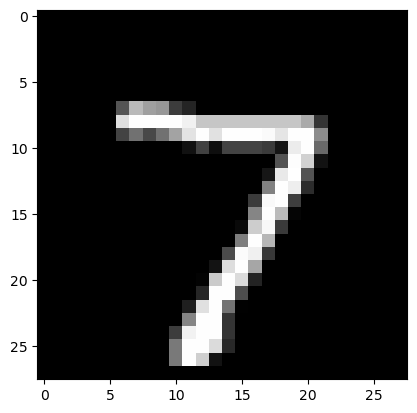

In [49]:
#Lets print the image as well
import matplotlib.pyplot as plt

plt.imshow(testX[0],cmap='gray')

In [50]:
np.argmax(testY[0])

7